<a href="https://colab.research.google.com/github/HarshCasper/Brihaspati/blob/master/MNIST%20Fashion/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

In [8]:
len(train_images)

60000

In [9]:
len(train_labels)

60000

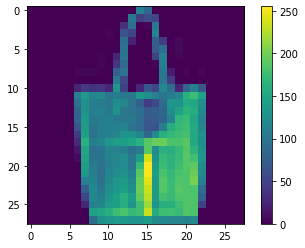

In [11]:
plt.figure()
plt.imshow(train_images[12050])
plt.colorbar()
plt.grid(False)

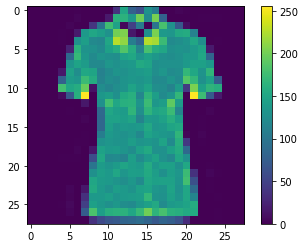

In [12]:
plt.figure()
plt.imshow(train_images[9656])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

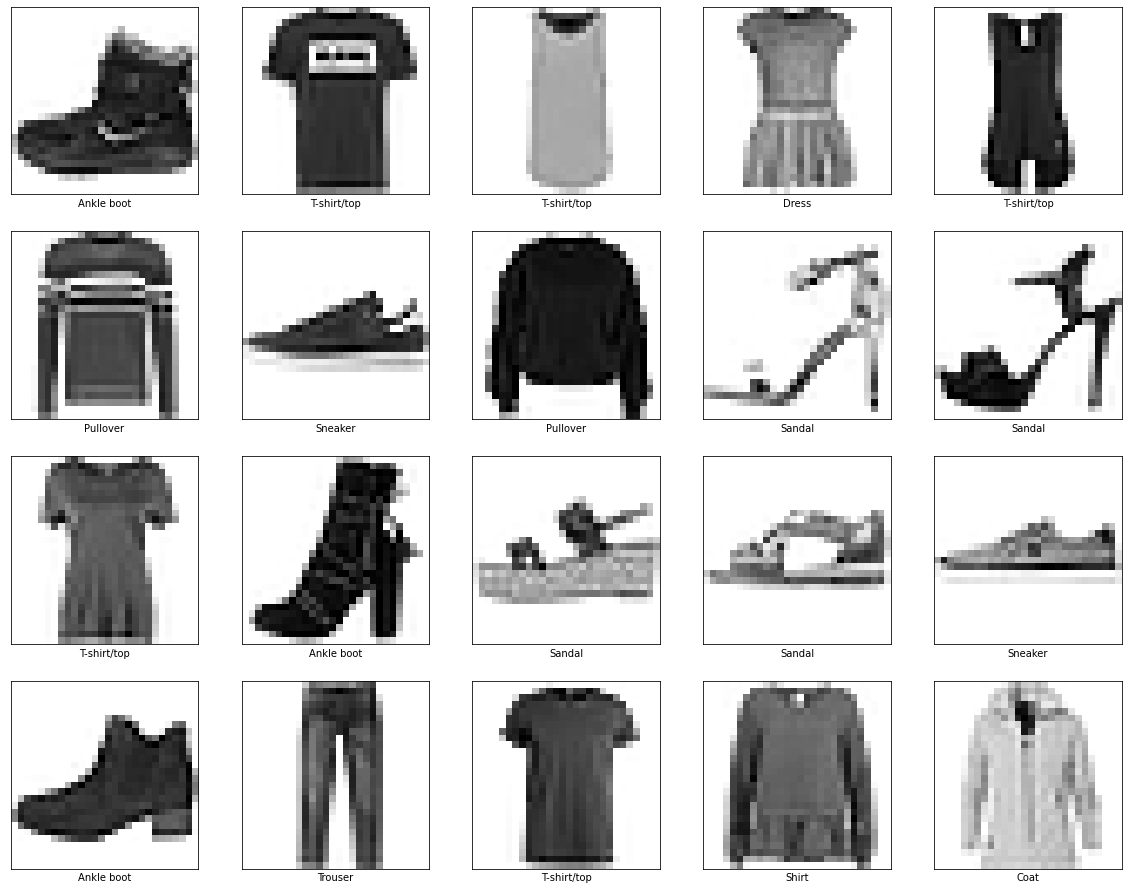

In [14]:
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i]])

In [0]:
classifier = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
classifier.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
classifier.fit(train_images, train_labels, epochs=250)

Epoch 1/250
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6710 - accuracy: 0.3520
Epoch 2/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6905 - accuracy: 0.7401
Epoch 3/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5305 - accuracy: 0.8120
Epoch 4/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5033 - accuracy: 0.8227
Epoch 5/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4791 - accuracy: 0.8300
Epoch 6/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4635 - accuracy: 0.8347
Epoch 7/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4543 - accuracy: 0.8377
Epoch 8/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4473 - accuracy: 0.8409
Epoch 9/250
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4407 - accuracy: 0.8426
Epoch 10/250
1875/1875 [==============================] - 3s 2ms/step - l

In [25]:
test_loss, test_acc = classifier.evaluate(test_images, test_labels)
predictions = classifier.predict(test_images)
print('Test Accuracy:', test_acc)

ERROR! Session/line number was not unique in database. History logging moved to new session 59
313/313 [==============================] - 0s 1ms/step - loss: 0.5052 - accuracy: 0.8350
Test Accuracy: 0.8349999785423279


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

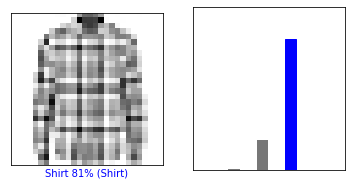

In [27]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

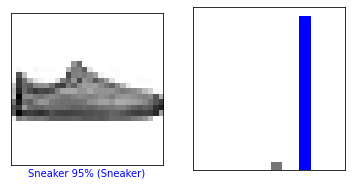

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

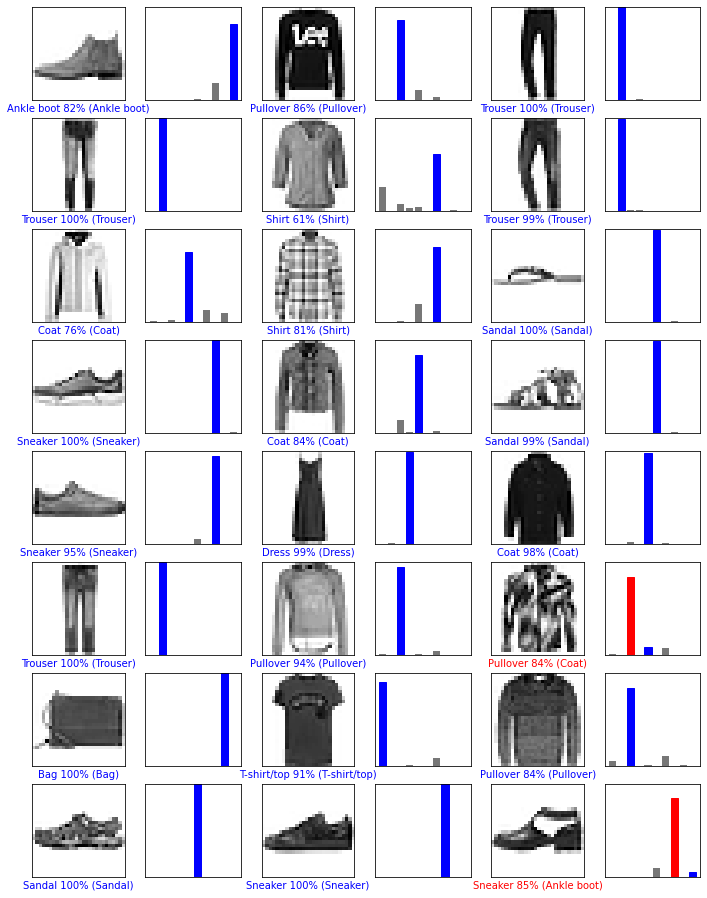

In [29]:
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)